In [ ]:
#1

import numpy as np
from PIL import Image
import os
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

# Parameters
Database_Size = 30
database_path = 'database'

# Initialize list to store image vectors
P = []

# Reading images from the database
for j in range(1, Database_Size + 1):
    image_path = os.path.join(database_path, f'person{j}.pgm')
    image = Image.open(image_path)
    image_array = np.array(image)

    # Get dimensions of the image
    m, n = image_array.shape

    # Reshape the image array to a column vector
    image_vector = image_array.reshape(m * n, 1)
    P.append(image_vector)

# Convert list to numpy array (matrix)
P = np.hstack(P)

# Print out the variables for verification
print(f"Database Size: {Database_Size}")
print(f"Image dimensions (m, n): ({m}, {n})")
print(f"P matrix shape: {P.shape}")


Database Size: 30
Image dimensions (m, n): (112, 92)
P matrix shape: (10304, 30)


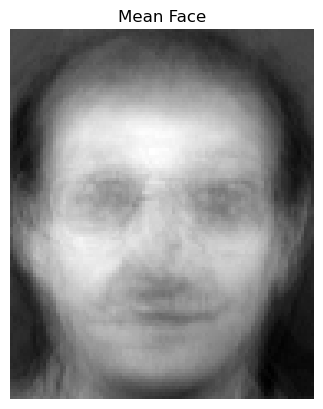

In [3]:
#2

# Compute the mean face
mean_face = np.mean(P, axis=1)

# Reshape the mean face back to the original image dimensions
mean_face_image = mean_face.reshape(m, n)

# Display the mean face image
plt.imshow(mean_face_image, cmap='gray')
plt.title('Mean Face')
plt.axis('off')  # Hide axis
plt.show()

In [4]:
#3

# Compute the mean face
mean_face = np.mean(P, axis=1)

# Convert P to double (float64 in numpy)
P = P.astype(np.float64)

# Subtract the mean face from each column of P
mean_face_column = mean_face.reshape(-1, 1)
P = P - mean_face_column @ np.ones((1, Database_Size))

# Print the first column of P to verify subtraction
print(P[:, 0])



[-38.8        -38.3        -42.73333333 ... -14.56666667 -14.4
 -16.33333333]


In [5]:
#4

# Compute the covariance matrix P^T * P
PTP = P.T @ P

# Compute the eigenvalues and eigenvectors of P^T * P
Values, Vectors = np.linalg.eig(PTP)

# Compute the actual eigenvectors of the covariance matrix
EigenVectors = P @ Vectors

# Normalize the eigenvectors
EigenVectors = EigenVectors / np.linalg.norm(EigenVectors, axis=0)

# Display the first few eigenvalues for verification
print("Eigenvalues:", Values)

Eigenvalues: [ 9.69069623e+07  4.87292722e+07  4.37900456e+07  3.34756826e+07
  2.46521889e+07  2.04782347e+07  1.63378623e+07  1.60131047e+07
  1.41415577e+07  1.32446059e+07 -9.73082574e-08  1.11004779e+07
  1.06792480e+07  9.84547441e+06  9.27154963e+06  8.44340124e+06
  7.68223964e+06  3.30696241e+06  3.42829390e+06  3.52946256e+06
  3.76629399e+06  4.17775602e+06  7.12503632e+06  6.92200481e+06
  4.74323775e+06  4.98622750e+06  5.37363278e+06  5.60944036e+06
  6.08634551e+06  6.37529704e+06]


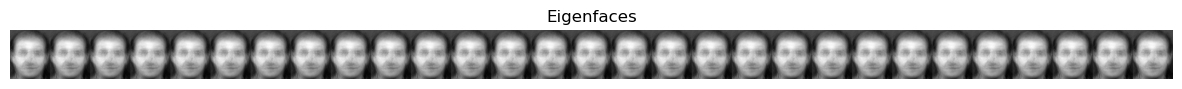

In [6]:
#5

# Display the set of eigenfaces
eigenfaces = []

for j in range(1, Database_Size):
    eigenface = EigenVectors[:, j] + mean_face
    eigenface_image = eigenface.reshape(m, n)
    eigenfaces.append(eigenface_image)

# Concatenate the eigenfaces horizontally
EigenFaces = np.hstack(eigenfaces)

# Display the eigenfaces
plt.figure(figsize=(15, 5))
plt.imshow(EigenFaces, cmap='gray')
plt.title('Eigenfaces')
plt.axis('off')  # Hide axis
plt.show()


In [7]:
#6

# Compute the Products matrix
Products = EigenVectors.T @ EigenVectors

# Print the Products matrix to verify orthogonality
print("Products matrix:")
print(Products)

# Check if Products matrix is diagonal
is_diagonal = np.allclose(Products, np.diag(np.diagonal(Products)))
print(f"Is Products matrix diagonal? {is_diagonal}")

Products matrix:
[[ 1.00000000e+00  8.90885537e-16  9.03270853e-16  1.87756203e-15
  -1.58232023e-15 -7.94086612e-16  1.19068268e-15 -2.36600019e-15
   2.22490144e-15  5.79792697e-15 -5.82876504e-02  1.22869752e-15
  -1.58803431e-15  1.07191765e-15 -1.13968283e-15 -4.95766690e-16
   6.75993278e-16 -4.12084239e-15 -2.51358382e-15 -6.78907432e-15
   2.68766519e-15  3.24964190e-15 -3.65803037e-16 -8.28872561e-16
  -5.44066880e-15  3.67931461e-15 -1.19245298e-15 -1.19953418e-15
  -3.79451533e-15 -3.39697481e-16]
 [ 8.90885537e-16  1.00000000e+00 -7.63285106e-16  2.10721468e-15
  -1.45633085e-15 -9.08676617e-16 -2.19278873e-15  1.55149331e-15
   1.72496057e-15  3.55396390e-15 -6.82900261e-03  3.62597864e-16
   9.24824453e-17  2.21266097e-15  1.43755721e-15 -2.52749210e-15
  -1.16948823e-15  2.10636088e-15 -1.06150847e-15  3.85161128e-16
  -6.28162344e-15 -1.04910113e-16  2.87528044e-15 -2.62539556e-16
  -3.97511207e-15 -3.15361547e-15  5.33191655e-15  5.64083285e-16
   4.78693047e-15 -3.988

Shape of U_approx: (10304, 1)
Expected shape: (10304, 1)


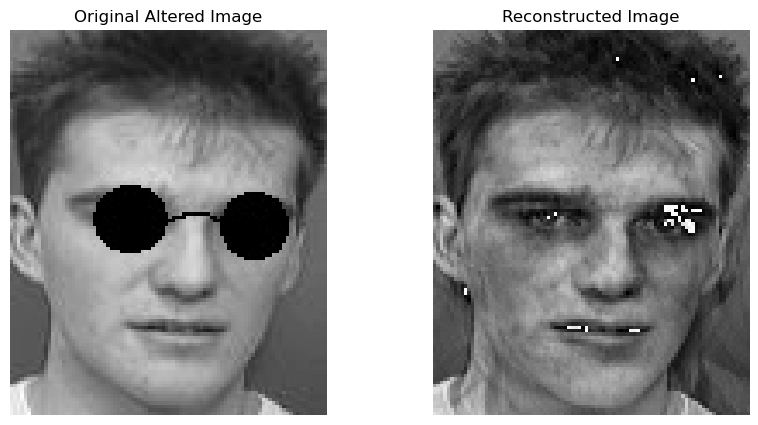

In [ ]:
#7

# Define image dimensions
m, n = 112, 92

# Read the altered image
altered_image_path = '/database/person30altered1.pgm'
image_read = Image.open(altered_image_path)
image_array = np.array(image_read)
U = image_array.reshape(m * n, 1)

# Compute the norms of the eigenvectors
Products = EigenVectors.T @ EigenVectors
NormsEigenVectors = np.diag(Products)

# Compute the projection coefficients
W = EigenVectors.T @ (U.astype(np.float64) - mean_face.reshape(-1, 1))
W = W / NormsEigenVectors.reshape(-1, 1)  # Ensure proper division

# Reconstruct the image from the projection
U_approx = EigenVectors @ W + mean_face.reshape(-1, 1)

# Print shapes for debugging
print("Shape of U_approx:", U_approx.shape)
print("Expected shape:", (m * n, 1))

# Ensure the shape matches for reshaping
if U_approx.shape[0] == m * n and U_approx.shape[1] == 1:
    image_approx = U_approx.reshape(m, n).astype(np.uint8)
else:
    raise ValueError(f"Cannot reshape array of size {U_approx.size} into shape ({m}, {n})")

# Display the original altered image and the reconstructed image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Altered Image')
plt.axis('off')  # Hide axis

plt.subplot(1, 2, 2)
plt.imshow(image_approx, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')  # Hide axis

plt.show()

Shape of U_approx: (10304, 1)
Expected shape: (10304, 1)


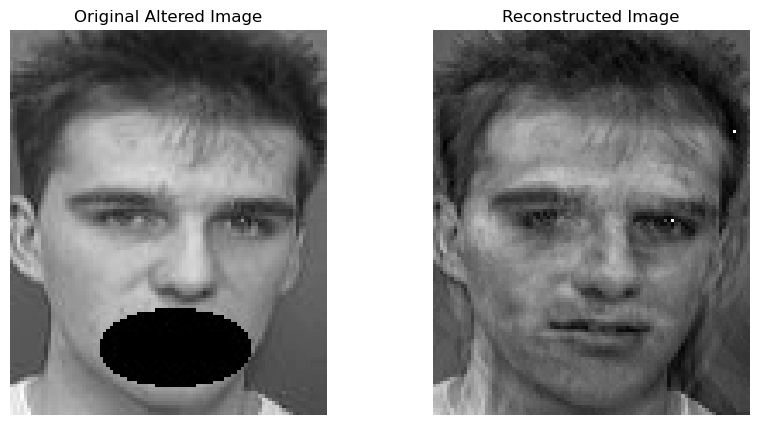

In [ ]:
#8

# Define image dimensions
m, n = 112, 92

# Read the altered image
altered_image_path = '/database/person30altered2.pgm'
image_read = Image.open(altered_image_path)
image_array = np.array(image_read)
U = image_array.reshape(m * n, 1)

# Compute the norms of the eigenvectors
Products = EigenVectors.T @ EigenVectors
NormsEigenVectors = np.diag(Products)

# Compute the projection coefficients
W = EigenVectors.T @ (U.astype(np.float64) - mean_face.reshape(-1, 1))
W = W / NormsEigenVectors.reshape(-1, 1)  # Ensure proper division

# Reconstruct the image from the projection
U_approx = EigenVectors @ W + mean_face.reshape(-1, 1)

# Print shapes for debugging
print("Shape of U_approx:", U_approx.shape)
print("Expected shape:", (m * n, 1))

# Ensure the shape matches for reshaping
if U_approx.shape[0] == m * n and U_approx.shape[1] == 1:
    image_approx = U_approx.reshape(m, n).astype(np.uint8)
else:
    raise ValueError(f"Cannot reshape array of size {U_approx.size} into shape ({m}, {n})")

# Display the original altered image and the reconstructed image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Altered Image')
plt.axis('off')  # Hide axis

plt.subplot(1, 2, 2)
plt.imshow(image_approx, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')  # Hide axis

plt.show()

Shape of U_approx: (10304, 1)
Expected shape: (10304, 1)


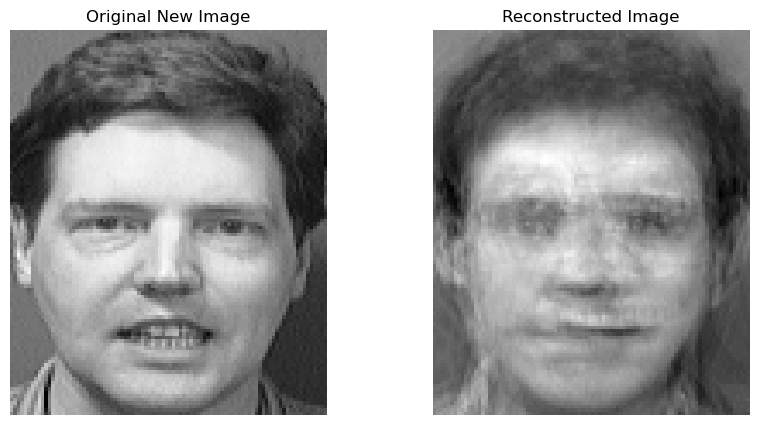

In [ ]:
#9

# %% Recognition and approximation of a new face (person31.pgm)
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define image dimensions
m, n = 112, 92

# Read the new image (person31.pgm)
new_image_path = '/database/person31.pgm'
image_read = Image.open(new_image_path)
image_array = np.array(image_read)
U = image_array.reshape(m * n, 1)

# Compute the norms of the eigenvectors
Products = EigenVectors.T @ EigenVectors
NormsEigenVectors = np.diag(Products)

# Compute the projection coefficients
W = EigenVectors.T @ (U.astype(np.float64) - mean_face.reshape(-1, 1))
W = W / NormsEigenVectors.reshape(-1, 1)  # Ensure proper division

# Reconstruct the image from the projection
U_approx = EigenVectors @ W + mean_face.reshape(-1, 1)

# Print shapes for debugging
print("Shape of U_approx:", U_approx.shape)
print("Expected shape:", (m * n, 1))

# Ensure the shape matches for reshaping
if U_approx.shape[0] == m * n and U_approx.shape[1] == 1:
    image_approx = U_approx.reshape(m, n).astype(np.uint8)
else:
    raise ValueError(f"Cannot reshape array of size {U_approx.size} into shape ({m}, {n})")

# Display the original new image and the reconstructed image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original New Image')
plt.axis('off')  # Hide axis

plt.subplot(1, 2, 2)
plt.imshow(image_approx, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')  # Hide axis

plt.show()

# Variables: image_read, U, NormsEigenVectors, W, U_approx
